In [1]:
import tensorflow as tf #importing tensorflow library

In [2]:
#for plotting the losses inline in this notebook

In [3]:
%matplotlib inline 

First model- Building fully connected neural network

Second Model- Building Convolutional layer

# First Model

# **The Task For The AI**

THe MNIST dataset contains 60000 images as training and 10000 for test set.We will use the keras python API with tensorflow as the backend.

In [4]:
#importing all the necessary libraries
import numpy as np #importing numpy for array operations
import matplotlib.pyplot as plt #library which will be used for plotting
import random # for generating random numbers
from keras.datasets import mnist  # MNIST dataset 
from keras.models import Sequential #Model to be used
from keras.layers.core import Dense,Dropout,Activation #different layers which will be used in the model
from keras.utils import np_utils #

# Why we will use keras.utils import np_utils?

--> A numpy array or vector which will have integers that represents the different categories, will be converted into numpy array or a matrix which will have binary valye and has same column equal to number of categories in the data.



Loading Training Data


In [5]:
# The MNIST data is split between 60000 simages (28px x 28px)
#60000 training images and 10000 test images (28px x 28px)
(X_train,y_train),(X_test,y_test)=mnist.load_data()
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


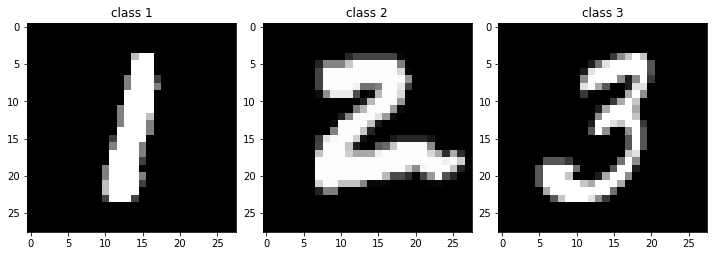

In [6]:
#Plotting sample images
plt.figure(figsize=(10,10))
#plt.rcParams['figure.figsize']=(9,9)
for i in range(3):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(X_train))
  plt.imshow(X_train[num],cmap='gray',interpolation='none') #here inplace of plt.plot plt.imshow is used because we are having images which are in the forms of vectore
  plt.title("class {}".format(y_train[num]))
plt.tight_layout()

In [7]:
# just a little function for printing a matrix of image
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")
# now print!        
matprint(X_train[num])

0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0   57  141  198  255  198   0  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0   29  114  226  255  255  255  255  255  86  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0   29  226  255  255  255  255  255  255  255  86  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0  141  255  255  255  255  141   29  141  255  57  0  0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0  226  255  170   86    0    0   29  2

Each pixel is 8 bit integer from 0-255.o for black and 255 is full white.
RGB -computer channels.Each of these channels also takes 8 bit integer-24 total -16,777216.

Normalizing the 28x28,we build our network to accept 784 length vector.

Each image should be reshaped (flattened) into vector because in dl inputs should be in 1d . We will normalize(Normalization) the input into range[0-1] rather than [0-255] because if we will not normalize then the value will come in negative.

In [8]:

X_train=X_train.reshape(60000,784) # reshape  to one dimension vector from 60000 28 x 28 matrices into 60000 784 vector
X_test=X_test.reshape(10000,784)   # reshape 10000 28 x 28 matrices into 784 vector

X_train=X_train.astype('float32') # changing integer into 32 bit floating point
X_test=X_test.astype('float32')
# NOrmalizing here formulae is different to ml the input will be between 0 and 1
X_train/=255
X_test/=255

print("Training matrix shape",X_train.shape)
print("testing matrix shape",X_test.shape)


Training matrix shape (60000, 784)
testing matrix shape (10000, 784)


# Why we need encoding for labels?

Modifying our classes into one hot format,i.e

A classification model with multiple classes doesn't work well if you don't have classes distributed in a binary matrix.

Suppose you have three clasess, the vector goes like this:

[1, 0, 0] = class 1

[0, 1, 0] = class 2

[0, 0, 1] = class 3

You use to_categorical to transform your training data before you pass it to your model.

If your training data uses classes as numbers, to_categorical will transform those numbers in proper vectors for using with models. You can't simply train a classification model without that.It will help the model in easily classifying the labels.

In [9]:
nb_classes=10 # number of unique digits

Y_train=np_utils.to_categorical(y_train,nb_classes)
Y_test=np_utils.to_categorical(y_test,nb_classes)


# Building 3 fully connected layers

In [10]:
# The sequential model is a linear stack of layer
model=Sequential() #making the model

# The first hidden layer

The first hidden layer is set of 512 nodes
Each node will receive an element from each input vector and apply some 

In [11]:
model.add(Dense(512,input_shape=(784,))) #adding first layer to our model   #input=784 pixel is our input

In [12]:
#An activation is a non linear function that is applied to the output
#In Relu positive values are unchanged
# Relu converts all the negative inputs to the nodes to zero
model.add(Activation('relu')) # relu--> f(x)=max(0,x)

In [13]:
# Dropout zeros a selection of random outputs
#dropout helps protect the model from memorizing 
# or overfitting the training data

model.add(Dropout(0.2)) # normal range of dropout is 0-0.5

# Why do we use dropout?

--> Dropout is a regularization technique which prevents neural network from overfitting. Regularization techniques methods like L1 and L2 reduces overfitting by modifying the cost function.On,the other hand dropuout modifies the network itslef.

Dropout randomly drops neurons during training.This means their will be no contribution in the forward pass and any weights updates will not be applied in the backpropogation.It means it will forces other neurons to make predictions for the missing neurons.

--> Dropout is applied for only training not for validation.

Adding second Hiddenlayer
Instead of each 512 node receiving 784 input from input image data thy receive 512 inputs from output of first 512 node layer





In [14]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

Final Layer


The final layer of 10 neurons will be fully connected to the previous hidden layer

In [15]:
# There will be 10 neurons
model.add(Dense(10))

In [16]:
#As the problem is of multiclassification problem so we will apply softmax  
model.add(Activation('softmax')) # softmax will give the prob between 0 and 1 for all the labels but sum of all the probability will be 1

What are trainable parameters and non trainable parameters in the summary?

 non-trainable parameters are the ones that are not trained using gradient descent.

Trainable parameters are those whose values is modified by the gradient descent

In [17]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [18]:
# Compiling the model
# Cost function- Categorical cross entropy is a loss function which will be use here.because we have multiple closs
#It is logg loss function well suited to comparing two probabilit distributions.
# it calculates how far predicted result is from actual results.


In [19]:
#optimizer helps you how quickly your models learns through gradient descent.The step size will be decided by learning rate.
model.compile(loss="categorical_crossentropy",
              optimizer='adam'
,metrics=['accuracy'])

In [20]:
#Train the model
model.fit(X_train,Y_train,
          batch_size=128,epochs=10
          ,verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 0.2515 - accuracy: 0.9250
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.1019 - accuracy: 0.9689
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0730 - accuracy: 0.9768
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0539 - accuracy: 0.9830
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0471 - accuracy: 0.9841
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0396 - accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9890
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0315 - accuracy: 0.9890
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9905
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0258 - accuracy: 0.9913

In [21]:
#Evaluating Model Accuracy
score=model.evaluate(X_test,Y_test)
print('Test score:',score[0])
print('Test accuracy:',score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9825
Test score: 0.06723090261220932
Test accuracy: 0.9825000166893005


# Inspecting the output

In [22]:
predicted_x=model.predict(X_test)
predicted_classes=np.argmax(predicted_x,axis=1)

# check whether item got wrong/right
correct_indices=np.nonzero(predicted_classes==y_test)[0]
incorrect_indices=np.nonzero(predicted_classes!=y_test)[0]

313/313 [==============================] - 1s 2ms/step


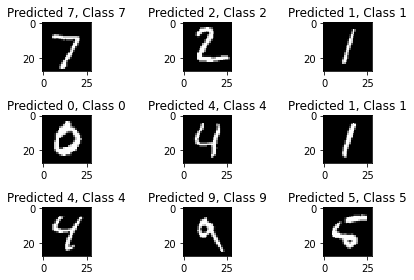

In [23]:
#plotting the images
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    


Training with batch size
How does batch size to 10000 affect training time and test accuracy?
How about a batch size of 32?

If we will increase the batch size to 10000 definetly the training size will decrease but there will be drop in accuracy also because this is not optimum batch size.It will miss some of the characterstics of the image and it may lead to overfitting

#Till now we were giving structured data if we will have unstructured data in the form of images then we have to use  convolutional network.

# Convolutional Network
We built a network that accepts a normalized pixel value.CNN applies filter /kernels to get feature map.



In [24]:
#Building CNN
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D,GlobalAveragePooling2D,Flatten #libraries which will be used during making Conv layer
from keras.layers.normalization.batch_normalization import BatchNormalization #for normalizing the output values

In [25]:
#Reload MNIST Dataset
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [26]:
X_train=X_train.reshape(60000,28,28,1) #single channel because we are having black images so there is only one channel
X_test=X_test.reshape(10000,28,28,1)   

X_train=X_train.astype('float32') # changing integer into 32 bit floating point
X_test=X_test.astype('float32')
# NOrmalizing here formulae is different to ml the input will be between 0 and 1
X_train/=255
X_test/=255

print("Training matrix shape",X_train.shape)
print("testing matrix shape",X_test.shape)

Training matrix shape (60000, 28, 28, 1)
testing matrix shape (10000, 28, 28, 1)


In [27]:
#One hot encoding
# we have to encode the vector to binary values so that model can easily classify the labels
nb_classes=10 # number of unique digits

Y_train=np_utils.to_categorical(y_train,nb_classes) 
Y_test=np_utils.to_categorical(y_test,nb_classes)

In [28]:
model=Sequential() #Building model


In [29]:
 #Convolutional Layer1
 model.add(Conv2D(32,(3,3),input_shape=(28,28,1))) #32 kernels size is 3x3 28 x 28 gray scale images

In [30]:
model.add(BatchNormalization(axis=-1)) #normalize each feture before Activation

Why axis=-1? why batch normalization?

Batch normaliztion helps to bringing the output in the range with mean close to zero and standard deviation close to 1.It will increase the training speed.
Reduces internal covariant shift-Covariate shift refers to the change in the input distribution to a learning system. In the case of deep networks, the input to each layer is affected by parameters in all the input layers. So even small changes to the network get amplified down the network. This leads to change in the input distribution to internal layers of the deep network and is known as internal covariate shift.



The axis argument is the axis for which the mean and standard deviation is calculated. That is, it averages over every axis except that specified. So ‘axis=-1’ means to calculate the mean and std dev for each item in the last axis.

In [31]:
convLayer01=Activation('relu') #activation function

In [32]:
model.add(convLayer01) #adding conv layer to the model

In [33]:
 #Convolutional Layer2
model.add(Conv2D(32,(3,3))) #32 kernels size 
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu')) #activation
convLayer02=MaxPooling2D(pool_size=(2,2))
model.add(convLayer02) #adding conv layer to the model


In [34]:
 #Convolutional Layer3
model.add(Conv2D(64,(3,3))) #64 kernels size is 3x3 28 x 28 gray scale images
model.add(BatchNormalization(axis=-1))
convLayer03=Activation('relu') #activation
model.add(convLayer03) #adding conv layer to the model


In [35]:
 #Convolutional Layer4
model.add(Conv2D(64,(3,3))) #64 kernels size is 3x3 28 x 28 gray scale images
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu')) #activation
convLayer04=MaxPooling2D(pool_size=(2,2))
model.add(convLayer04) #adding conv layer to the model
model.add(Flatten())

In [36]:
#Fully Connected Layer 5
model.add(Dense(512)) #512 FCN
model.add(BatchNormalization())
model.add(Activation('relu'))

In [37]:
#Final Output Layer 6
model.add(Dropout(0.2))  #20% dropout of random
model.add(Dense(10))     # final 10 neurons because we are having 10 class labels
model.add(Activation('softmax')) #softmax activation

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [39]:
# We will use the adam optimizer for optimizing the weights and biases
# we are using cross entropy as loss function because our problem is of multi classification
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation
#Reshaping the images so that we can use same images for model validation rather than taking images from the training or test set.
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [41]:
# We can then feed our augmented data in batches
#Besides loss function consideration as before
# this method actually results in significant memory savings
#because we are actually loading the data into the networks in batces


train_generator=gen.flow(X_train,Y_train,batch_size=128)
test_generator=test_gen.flow(X_test,Y_test,batch_size=128)

In [42]:
#instead of fit we are using fit generator





model.fit_generator(train_generator,steps_per_epoch=60000//128,epochs=5,verbose=1,
                validation_data=test_generator,
                validation_steps=10000//128    )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


468/468 [==============================] - 27s 41ms/step - loss: 0.1318 - accuracy: 0.9587 - val_loss: 0.0599 - val_accuracy: 0.9823
Epoch 2/5
468/468 [==============================] - 19s 40ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.1156 - val_accuracy: 0.9671
Epoch 3/5
468/468 [==============================] - 19s 41ms/step - loss: 0.0377 - accuracy: 0.9881 - val_loss: 0.0198 - val_accuracy: 0.9934
Epoch 4/5
468/468 [==============================] - 19s 41ms/step - loss: 0.0353 - accuracy: 0.9889 - val_loss: 0.0493 - val_accuracy: 0.9833
Epoch 5/5
468/468 [==============================] - 20s 42ms/step - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0280 - val_accuracy: 0.9913


In [43]:
score=model.evaluate(X_test,Y_test)
print('test score:',score[0])
print('test accuracy:',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0282 - accuracy: 0.9912
test score: 0.028170956298708916
test accuracy: 0.9911999702453613
